# L3 Analyse Numérique – TP7

[Dequay A](mailto:antoine.dequay@ens-rennes.fr) &
[Le Barbenchon P](mailto:pierre.le-barbenchon@ens-rennes.fr). TP ENS Rennes

[Boutin B](mailto:benjamin.boutin@univ-rennes1.fr). Cours et TP Université de Rennes 1 - UFR Mathématiques

Dans ce TP, on étudiera des méthodes numériques de calcul de solutions d'équations différentielles.

- Exercice 1 : *Schéma d'Euler explicite*
- Exercice 2 : *Méthodes symplectiques*

Contrairement au TP précédent, **on n'utilisera pas la bibliothèque `scipy.integrate` et sa fonction `odeint`**. Le but est de programmer des méthodes qui la remplacent à la main.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
#%pip install ffmpeg # --> optionnel

## Exercice 1 : Schéma d'Euler explicite

On considère un problème de Cauchy :

$$ \left \{
\begin{aligned}
	y' &= f(t,y)\\
	y(t_0) &= y^0.
\end{aligned}
\right . $$

où $f$ est une fonction définie sur un ouvert $U$ de $\mathbb{R} \times \mathbb{R}^{d}$, à valeurs dans $\mathbb{R}^d$, $(t_0,y^0) \in U$ est la condition initiale.

Sous l'hypothèse que $f$ est continue sur $U$ et *localement lipschitzienne* par rapport à sa seconde variable $y$, le **théorème de Cauchy-Lipschitz** garantit l'existence d'une unique solution maximale $y$, définie et continûment différentiable sur un intervalle $I$ ouvert contenant $t_0$.

Pour simplifier, on se limitera au cas des équations autonomes (la fonction $f$ ne dépendant alors pas de $t$) vérifiant de plus que $f\in\mathcal{C}^1(\mathbb{R}^d;\mathbb{R}^d)$ est de différentielle bornée, si bien que toutes les solutions sont globales et définies de manière unique par leur valeur en $t_0=0$.

En intégrant le problème de Cauchy entre deux instants $t$ et $t+h$ où $h>0$, on obtient la formulation:

$$
y(t+h)=y(t)+\int_t^{t+h} f(s,y(s))\mathrm{d} s.
$$

Les méthodes numériques permettant de résoudre le problème de Cauchy sont obtenues sur la base d'une formule d'approximation de cette intégrale par une méthode de quadrature.

La méthode d'**Euler explicite** définit une suite d'instants $(t_i)$ et des approximations $y_i\in\mathbb{R}^d$ de la solution exacte $y(t_i)$. Elle se base sur une approximation de l'intégrale précédente par l'approximation des rectangles à gauche. La relation de récurrence prend alors la forme:
$$
\begin{aligned}
&y_{0} = y^0,\\
&\forall i\in\mathbb{N},\quad y_{i+1} = y_{i}+h_{i}f(t_i,y_{i}),\\
&\forall i\in\mathbb{N},\quad t_{i+1} = t_{i}+h_{i}.
\end{aligned}
$$

Typiquement, considérant un intervalle $[0,t_f]$, on fixe un entier $N$. Le pas $h_i$ est alors choisi égal à $h=t_f/N$ pour tout $i$, $0\leq i\leq N$, de sorte que l'approximation se fait aux points de la subdivision uniforme $0=t_0<t_1<\dots<t_{N-1}<t_{N}=t_f$.

### Question 1

Programmer cette méthode sur l'exemple élémentaire : $y'=-10y$ avec la donnée de Cauchy $(t_0,y^0)=(0,1)$ sur l'intervalle de temps $[0,5]$. Comparer graphiquement la solution approchée avec la solution exacte $y$, ceci pour différentes valeurs de l'entier $N$.

### Question 2

Vérifier expérimentalement que la convergence est au moins d'ordre $1$ au sens où il existe une constante $C$, dépendant de $y^0$, $f$ et $t_f$ seulement, telle que si on note $h=\sup_{i}(t_{i+1}-t_{i})$, on a:
$$\sup_{0\leq i\leq N}\vert y(t_i)-y_i\vert \leq Ch.$$


#### **Application : équation de la chaleur instationnaire**

On cherche à approcher la solution instationnaire de l'EDP:
$$
\frac{\partial u(t,x)}{\partial t}=\frac{\partial ^2u(t,x)}{\partial x^2}+s(x),
$$
avec les conditions au bord $u(t,0)=u(t,1)=0$ pour tout $t\geq 0$. En guise de discrétisation en espace du problème, on procède par différences finies avec un pas $\Delta x=1/(N_x+1)$. Le problème semi-discret consiste alors en un système d'EDO posé dans $\mathbb{R}^{N_x}$:
$$
U'(t)=-AU(t)+S,
$$
où l'on note $U(t)=(u_i(t))_{1\leq i\leq N_x}$ tel que $u_i(t)$ approche $u(t,i\Delta x)$, et $u_0(t)=u_{N_x+1}(t)=0$. Le second membre $S$ vérifie $S_i=s(i\,\Delta x)$. La matrice $A$ symétrique définie et positive déjà rencontrée maintes fois est
$$
A=\frac1{\Delta x^2}\left(\begin{array}{cccccc}2& -1 & 0 & \cdots & \cdots & 0 \\-1 & 2& -1 & 0 &  & \vdots \\0 & \ddots & \ddots & \ddots & \ddots & \vdots \\\vdots & \ddots & -1 & 2& -1 & 0 \\\vdots &  & \ddots & \ddots & \ddots & -1 \\0 & \cdots & \cdots & 0 & -1 & 2\end{array}\right).
$$


### Question 3

Pour la donnée initiale $u(0,x)=\sin(\pi x)+\tfrac{1}{2}\sin(5\pi x)$ et le terme source $s(x)=100\sin(5\pi x)$, résoudre le problème sur l'intervalle de temps $[0,1]$ par la méthode d'Euler explicite.

On utilisera $N_x = 10$ et successivement $h=0.01$ puis $h=0.001$. Tester ensuite des valeurs plus grandes de $N_x$. Pour tracer la solution au cours du temps, on exécutera le bloc suivant et on utilisera la fonction `creer_animation`.

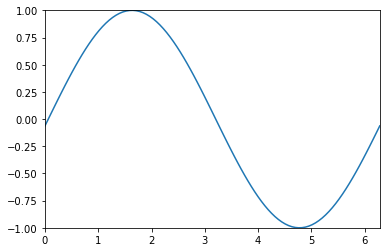

In [2]:
from Animation import creer_animation

def exemple():
    def f_exemple(t):#renvoie le graphe (X,Y) à tracer à la frame numéro t
        X = np.linspace(0, 2*np.pi, 100)
        Y = np.sin(X + t * 2 * np.pi / 100)
        return (X, Y)

    nb_frames = 100 #le nombre de frames à afficher

    creer_animation(f_exemple,
                    nb_frames,
                    "exemple.gif",#nom du fichier dans lequel on enregistre l'animation
                    frame_time=20,#temps entre l'affichage de deux frames
                    xmin = 0, xmax = 2*np.pi, ymin = -1, ymax = 1 #cadre dans lequel est dessiné l'animation
                    )

exemple()
# dans le même dossier que votre fichier .ipynb, vous trouverez un gif de votre animation !

### Question 4

Résoudre ce même problème avec la méthode d'Euler implicite :

$$\forall i \in \mathbb{N},\quad y_{i+1} = y_{i}+h_{i}f(t_{i+1},y_{i+1}).$$

## Exercice 2 : Méthodes symplectiques

Étant donné une fonction $H\in\mathcal{C}^1(\mathbb{R}^d\times \mathbb{R}^d;\mathbb{R})$, on définit le système hamiltonien :
$$ \left\{
\begin{aligned}
&p'(t)=-\nabla_q H(p,q),\\
&q'(t)=\nabla_p H(p,q).
\end{aligned}
\right. $$
De nombreux systèmes de la physique prenne la forme précédente (cf. cours de Philippe Chartier).
À titre d'exemple, citons le cas du mouvement d'une particule ponctuelle de masse $m$, de position $q\in\mathbb{R}^d$ et de moment $p\in\mathbb{R}^d$, soumise à une force $F$ dérivant d'un potentiel $V:\mathbb{R}^d\longrightarrow \mathbb{R}$, avec donc $F=-\nabla V(q)$. Le principe fondamental de la dynamique s'écrit alors $mq'' = -\nabla V$, soit encore $mq'=p$ et $p'=-\nabla V(q)$. Le Hamiltonien concerné est alors l'énergie totale du système physique : $H(p,q)=\frac{1}{2m}\vert p\vert^2+V(q)$ et le système différentiel prend la forme ci-dessus.


### Question 1

Vérifier brièvement que pour toute solution maximale $(p,q)\in\mathcal{C}^1(\mathbb{R},\mathbb{R}^d\times\mathbb{R}^d)$, le hamiltonien $H(p,q)$ est constant au cours du temps. En déduire que si les ensembles de niveaux de $H$ sont compacts, alors les trajectoires sont toutes globales.

### Question 2

On se place dans le cas de l'oscillateur harmonique : $H(p,q)=p^2+q^2$ (avec $d=1$).
Comment l'énergie du système évolue-t-elle numériquement avec les méthodes d'Euler explicite et d'Euler implicite ?

### Question 3

Que se passe-t-il avec la méthode d'\textbf{Euler symplectique} suivante ?
$$
\left\{
\begin{aligned} 
	p_{i+1}=p_i-h_i \nabla_q H(p_{i},q_{i+1})\\
	q_{i+1}=q_i+h_i \nabla_p H(p_{i},q_{i+1})
\end{aligned}
\right.
$$

#### **Application : le problème des ressorts**

Un système de cinq masses assimilées à des points matériels $P\in\{A,B,C,D,E\}$ tous de même masse $m=1$ sont reliés par sept ressorts comme l'indique le schéma suivant. Les points sont soumis aux seules forces issues de l'effet de ces ressorts, en particulier la gravité et les frottements éventuels ne sont pas considérés.

![](TP07_schema.svg)


Chaque ressort $r$ est caractérisé par une constante de raideur $k_r$ et une longueur d'équilibre $L^0_r$ ; sa longueur effective dans la configuration courant est notée $L_r$. Les valeurs indiquées sur le schéma correspondent aux données $(k_r,L_r^0)$. Les points de base $A=(0,0)$ et $B=(3,0)$ sont fixés dans le plan $\mathbb{R}^2$. L'énergie potentielle et l'énergie cinétique du système sont respectivement :
$$
E_{\mathrm{pot}} = \sum_{r} \dfrac{1}{2} k_r (L^0_r-L_r)^2,\qquad
E_{\mathrm{kin}} = \sum_{P} \dfrac{1}{2} m \left\vert \dfrac{dP}{dt}\right\vert^2.
$$
Le système est hamiltonien avec :
$$
\begin{aligned}
&q={}^t(x_C,y_C,x_D,y_D,x_E,y_E),\\
&p={}^t(\dot x_C,\dot y_C,\dot x_D,\dot y_D,\dot x_E,\dot y_E),\\
&H(p,q) = E_{\mathrm{pot}}+E_{\mathrm{kin}}.
\end{aligned}
$$

Nous vous fournissons des fonctions pré-programmées qui pourront être librement utilisées dans `RessortLibrary.py`.

### Question 3

Déterminer par une méthode d'Euler explicite, la configuration du système à l'instant $t_f=20$ avec un pas $h=0.1$, pour la donnée de Cauchy $p^0=0_{\mathbb{R}^6}$ et $q^0={}^t(0.5,1.5,3.5,1.5,1,-0.5)$.

In [3]:
from RessortLibrary import *


### Question 4
Tracer l'évolution de l'énergie potentielle, de l'énergie cinétique et de l'énergie totale du système au cours du temps, pour la solution numérique précédemment obtenue.

### Question 5

Reprendre ces deux questions en utilisant cette fois-ci une méthode d'Euler symplectique.

### Question 6

On ajoute une force de frottement de la forme $-\alpha p$ dans la seconde équation, avec $\alpha>0$. Que donnent les deux méthodes précédentes (configuration géométrique et énergie totale) ? On pourra résoudre sur $[0,100]$ avec un pas $h=0.1$ et pour un coefficient de frottement $\alpha=0.1$.
